<a href="https://colab.research.google.com/github/NollyKeyz/Deep-Learning/blob/main/Simple_Neural_Network_Embedding_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Knowledge Williams**

## @00738605

## Email Inbox Texts Classification Starting with Raw Text and Using the Embedding Space

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
import pandas as pd

email_document = pd.read_csv('email_data.csv')

In [ ]:
email_document['Subject']

0       @knowledgemwilli, check out the notifications ...
1         Nollyedge, see who you already know on LinkedIn
2       Haitian Crown Jewels shared "How a Sneaky Furn...
3       Nollyedge, you have 1 new update and 2 invitat...
4                 GeNS Transaction Alert [Debit: 100.00 ]
                              ...                        
5995    @knowledgemwilli, check out the notifications ...
5996          Proverb for Saturday, September 25  (25:11)
5997    Fitbit Brand Day | Shop Smartwatches, Fitness ...
5998                      Knowledge Williams, we miss you
5999    =?UTF-8?B?8J+OgiBJdCdzIEVtbWFudWVs?=\r\n =?UTF...
Name: Subject, Length: 6000, dtype: object

In [ ]:
email_document.head()

,Unnamed: 0,Label,Subject,Body
0,b'1',b'1',"@knowledgemwilli, check out the notifications ...",Twitter \r\n> https://twitter.com\r\n\r\nYou'v...
1,b'2',b'2',"Nollyedge, see who you already know on LinkedIn",------------------------------------\r\n\r\nNo...
2,b'3',b'3',"Haitian Crown Jewels shared ""How a Sneaky Furn...","@knowledgemwilli, see what's happening in the ..."
3,b'4',b'4',"Nollyedge, you have 1 new update and 2 invitat...","Nollyedge, see what your network has been up t..."
4,b'5',b'5',GeNS Transaction Alert [Debit: 100.00 ],\r\n\r\n\r\n\r\n \r\n \r\n \r\n ...


In [ ]:
print(email_document.shape)

(6000, 4)


## **Preprocessing**

In [ ]:
!pip install contractions

import contractions # useful for single words containing certain characters
import re # for implementing some of the preprocessing steps
from string import punctuation # the punctuation is used to escape punctuation

def clean_text(text):
    # make text lowercase
    text = str(text).lower()
    #  remove HTML tags
    text = re.sub(r'<[^>]+>', ' ', text)
    # remove text in square brackets
    text = re.sub('\[.*?\]', ' ', text)
    # expand contractions especially for words with apostrophe
    text = " ".join([contractions.fix(expanded_word) for expanded_word in text.split()])
    # remove links
    text = re.sub('https?://\S+|www\.\S+', ' ', text)
    text = re.sub('<.*?>+', ' ', text)
    # remove new lines
    text = re.sub('\n', ' ', text)
    # remove words containing numbers
    text = re.sub('\w*\d\w*', ' ', text)
    # remove punctuation
    text = re.sub('[%s]' % re.escape(punctuation), ' ', text)
    return text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 12.4 MB/s eta 0:00:00


In [ ]:
# apply clean text fuction on each email in the training dataset
email_document['Clean_Body'] = email_document['Body'].apply(lambda x:clean_text(x))
email_document['Clean_Subject'] = email_document['Subject'].apply(lambda x:clean_text(x))

email_document.head()

,Unnamed: 0,Label,Subject,Body,Clean_Body,Clean_Subject
0,b'1',b'1',"@knowledgemwilli, check out the notifications ...",Twitter \r\n> https://twitter.com\r\n\r\nYou'v...,twitter you have got recent notification...,knowledgemwilli check out the notifications ...
1,b'2',b'2',"Nollyedge, see who you already know on LinkedIn",------------------------------------\r\n\r\nNo...,nollyedge...,nollyedge see who you already know on linkedin
2,b'3',b'3',"Haitian Crown Jewels shared ""How a Sneaky Furn...","@knowledgemwilli, see what's happening in the ...",knowledgemwilli see what is happening in the...,haitian crown jewels shared how a sneaky furn...
3,b'4',b'4',"Nollyedge, you have 1 new update and 2 invitat...","Nollyedge, see what your network has been up t...",nollyedge see what your network has been up t...,nollyedge you have new update and invitat...
4,b'5',b'5',GeNS Transaction Alert [Debit: 100.00 ],\r\n\r\n\r\n\r\n \r\n \r\n \r\n ...,aug dear williams knowledge mkpoikanke gu...,gens transaction alert


In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

# calculate the number of sentences for each email body and
email_document['no_body_sentences'] = email_document['Clean_Body'].apply(lambda x: len(sent_tokenize(x)))
email_document['no__subject_sentences'] = email_document['Clean_Subject'].apply(lambda x: len(sent_tokenize(x)))

email_document.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,Unnamed: 0,Label,Subject,Body,Clean_Body,Clean_Subject,no_body_sentences,no__subject_sentences
0,b'1',b'1',"@knowledgemwilli, check out the notifications ...",Twitter \r\n> https://twitter.com\r\n\r\nYou'v...,twitter you have got recent notification...,knowledgemwilli check out the notifications ...,1,1
1,b'2',b'2',"Nollyedge, see who you already know on LinkedIn",------------------------------------\r\n\r\nNo...,nollyedge...,nollyedge see who you already know on linkedin,1,1
2,b'3',b'3',"Haitian Crown Jewels shared ""How a Sneaky Furn...","@knowledgemwilli, see what's happening in the ...",knowledgemwilli see what is happening in the...,haitian crown jewels shared how a sneaky furn...,1,1
3,b'4',b'4',"Nollyedge, you have 1 new update and 2 invitat...","Nollyedge, see what your network has been up t...",nollyedge see what your network has been up t...,nollyedge you have new update and invitat...,1,1
4,b'5',b'5',GeNS Transaction Alert [Debit: 100.00 ],\r\n\r\n\r\n\r\n \r\n \r\n \r\n ...,aug dear williams knowledge mkpoikanke gu...,gens transaction alert,1,1


In [ ]:
from nltk.tokenize import word_tokenize


# tokenize each of the email into words
email_document['email_body_words'] = email_document['Clean_Body'].apply(lambda x:word_tokenize(str(x)))
email_document['subject_words'] = email_document['Clean_Subject'].apply(lambda x:word_tokenize(str(x)))

email_document.head()

,Unnamed: 0,Label,Subject,Body,Clean_Body,Clean_Subject,no_body_sentences,no__subject_sentences,email_body_words,subject_words
0,b'1',b'1',"@knowledgemwilli, check out the notifications ...",Twitter \r\n> https://twitter.com\r\n\r\nYou'v...,twitter you have got recent notification...,knowledgemwilli check out the notifications ...,1,1,"[twitter, you, have, got, recent, notification...","[knowledgemwilli, check, out, the, notificatio..."
1,b'2',b'2',"Nollyedge, see who you already know on LinkedIn",------------------------------------\r\n\r\nNo...,nollyedge...,nollyedge see who you already know on linkedin,1,1,"[nollyedge, of, people, find, jobs, through, p...","[nollyedge, see, who, you, already, know, on, ..."
2,b'3',b'3',"Haitian Crown Jewels shared ""How a Sneaky Furn...","@knowledgemwilli, see what's happening in the ...",knowledgemwilli see what is happening in the...,haitian crown jewels shared how a sneaky furn...,1,1,"[knowledgemwilli, see, what, is, happening, in...","[haitian, crown, jewels, shared, how, a, sneak..."
3,b'4',b'4',"Nollyedge, you have 1 new update and 2 invitat...","Nollyedge, see what your network has been up t...",nollyedge see what your network has been up t...,nollyedge you have new update and invitat...,1,1,"[nollyedge, see, what, your, network, has, bee...","[nollyedge, you, have, new, update, and, invit..."
4,b'5',b'5',GeNS Transaction Alert [Debit: 100.00 ],\r\n\r\n\r\n\r\n \r\n \r\n \r\n ...,aug dear williams knowledge mkpoikanke gu...,gens transaction alert,1,1,"[aug, dear, williams, knowledge, mkpoikanke, g...","[gens, transaction, alert]"


In [ ]:
from collections import Counter # used for counting the frequency of words appearance

top = Counter([item for sublist in email_document['email_body_words'] for item in sublist])
temp_df = pd.DataFrame(top.most_common(40))
temp_df.columns = ['Common_words','count']
temp_df.style.background_gradient(cmap = 'Blues')

,Common_words,count
0,the,62241
1,to,45814
2,and,45440
3,of,36155
4,for,31814
5,you,30331
6,important,25479
7,a,24563
8,is,21869
9,in,18249


In [ ]:
import nltk
from nltk.corpus import stopwords # i imported this to remove stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = stopwords.words('english')
stop_words.extend(['utf', 'b', 'q'])

def remove_stopwords(texts):
  return [word for word in texts if word not in stop_words]

email_document['email_body_without_sw'] = email_document['email_body_words'].apply(lambda x:remove_stopwords(x))
email_document['subject_without_sw'] = email_document['subject_words'].apply(lambda x:remove_stopwords(x))
email_document.head()

,Unnamed: 0,Label,Subject,Body,Clean_Body,Clean_Subject,no_body_sentences,no__subject_sentences,email_body_words,subject_words,email_body_without_sw,subject_without_sw
0,b'1',b'1',"@knowledgemwilli, check out the notifications ...",Twitter \r\n> https://twitter.com\r\n\r\nYou'v...,twitter you have got recent notification...,knowledgemwilli check out the notifications ...,1,1,"[twitter, you, have, got, recent, notification...","[knowledgemwilli, check, out, the, notificatio...","[twitter, got, recent, notifications, twitter,...","[knowledgemwilli, check, notifications, twitter]"
1,b'2',b'2',"Nollyedge, see who you already know on LinkedIn",------------------------------------\r\n\r\nNo...,nollyedge...,nollyedge see who you already know on linkedin,1,1,"[nollyedge, of, people, find, jobs, through, p...","[nollyedge, see, who, you, already, know, on, ...","[nollyedge, people, find, jobs, people, know, ...","[nollyedge, see, already, know, linkedin]"
2,b'3',b'3',"Haitian Crown Jewels shared ""How a Sneaky Furn...","@knowledgemwilli, see what's happening in the ...",knowledgemwilli see what is happening in the...,haitian crown jewels shared how a sneaky furn...,1,1,"[knowledgemwilli, see, what, is, happening, in...","[haitian, crown, jewels, shared, how, a, sneak...","[knowledgemwilli, see, happening, world, opt]","[haitian, crown, jewels, shared, sneaky, furni..."
3,b'4',b'4',"Nollyedge, you have 1 new update and 2 invitat...","Nollyedge, see what your network has been up t...",nollyedge see what your network has been up t...,nollyedge you have new update and invitat...,1,1,"[nollyedge, see, what, your, network, has, bee...","[nollyedge, you, have, new, update, and, invit...","[nollyedge, see, network, see, new, notificati...","[nollyedge, new, update, invitations, waiting,..."
4,b'5',b'5',GeNS Transaction Alert [Debit: 100.00 ],\r\n\r\n\r\n\r\n \r\n \r\n \r\n ...,aug dear williams knowledge mkpoikanke gu...,gens transaction alert,1,1,"[aug, dear, williams, knowledge, mkpoikanke, g...","[gens, transaction, alert]","[aug, dear, williams, knowledge, mkpoikanke, g...","[gens, transaction, alert]"


In [ ]:
top = Counter([item for sublist in email_document['email_body_without_sw'] for item in sublist])
temp_df = pd.DataFrame(top.most_common(40))
temp_df.columns = ['Common_words','count']
temp_df.style.background_gradient(cmap = 'Greens')

,Common_words,count
0,important,25479
1,academic,13033
2,university,12904
3,nbsp,12642
4,session,11660
5,email,9147
6,admission,8750
7,width,8320
8,facebook,8256
9,god,7499


In [ ]:
top = Counter([item for sublist in email_document['subject_without_sw'] for item in sublist])
temp_df = pd.DataFrame(top.most_common(40))
temp_df.columns = ['Common_words','count']
temp_df.style.background_gradient(cmap = 'Reds')

,Common_words,count
0,proverb,986
1,updates,928
2,latest,740
3,edu,738
4,school,579
5,gist,573
6,new,305
7,knowledge,297
8,alert,294
9,williams,287


In [ ]:
def class_creation(subjects):

  # Keywords for identifying different categories
  social_keywords = ['facebook', 'email', 'emails', 'linkedin', 'post', 'twitter', 'commented', 'posts', 'page', 'invitation', 'invitations', 'posted', ]
  religious_plus_education_keywords = ['proverb', 'school']
  finance_keywords = ['transaction', 'gens', 'otp']

  # Initialize list to store labelled subjects
  result = []

  for subject in subjects:
    if any(keyword in subject for keyword in social_keywords):
      result.append('social')
    elif any(keyword in subject for keyword in religious_plus_education_keywords):
      result.append('religious and education')
    elif any(keyword in subject for keyword in finance_keywords):
      result.append('finance')
    else:
      result.append('other updates')
  return result


email_document['class_labels'] = class_creation(email_document['subject_without_sw'])
email_document.head()

,Unnamed: 0,Label,Subject,Body,Clean_Body,Clean_Subject,no_body_sentences,no__subject_sentences,email_body_words,subject_words,email_body_without_sw,subject_without_sw,class_labels
0,b'1',b'1',"@knowledgemwilli, check out the notifications ...",Twitter \r\n> https://twitter.com\r\n\r\nYou'v...,twitter you have got recent notification...,knowledgemwilli check out the notifications ...,1,1,"[twitter, you, have, got, recent, notification...","[knowledgemwilli, check, out, the, notificatio...","[twitter, got, recent, notifications, twitter,...","[knowledgemwilli, check, notifications, twitter]",social
1,b'2',b'2',"Nollyedge, see who you already know on LinkedIn",------------------------------------\r\n\r\nNo...,nollyedge...,nollyedge see who you already know on linkedin,1,1,"[nollyedge, of, people, find, jobs, through, p...","[nollyedge, see, who, you, already, know, on, ...","[nollyedge, people, find, jobs, people, know, ...","[nollyedge, see, already, know, linkedin]",social
2,b'3',b'3',"Haitian Crown Jewels shared ""How a Sneaky Furn...","@knowledgemwilli, see what's happening in the ...",knowledgemwilli see what is happening in the...,haitian crown jewels shared how a sneaky furn...,1,1,"[knowledgemwilli, see, what, is, happening, in...","[haitian, crown, jewels, shared, how, a, sneak...","[knowledgemwilli, see, happening, world, opt]","[haitian, crown, jewels, shared, sneaky, furni...",other updates
3,b'4',b'4',"Nollyedge, you have 1 new update and 2 invitat...","Nollyedge, see what your network has been up t...",nollyedge see what your network has been up t...,nollyedge you have new update and invitat...,1,1,"[nollyedge, see, what, your, network, has, bee...","[nollyedge, you, have, new, update, and, invit...","[nollyedge, see, network, see, new, notificati...","[nollyedge, new, update, invitations, waiting,...",social
4,b'5',b'5',GeNS Transaction Alert [Debit: 100.00 ],\r\n\r\n\r\n\r\n \r\n \r\n \r\n ...,aug dear williams knowledge mkpoikanke gu...,gens transaction alert,1,1,"[aug, dear, williams, knowledge, mkpoikanke, g...","[gens, transaction, alert]","[aug, dear, williams, knowledge, mkpoikanke, g...","[gens, transaction, alert]",finance


In [ ]:
def access_num_label(string_label):
  labels = []
  for label in string_label:
    if label == 'social':
      labels.append(int(0))
    elif label == 'finance':
      labels.append(int(1))
    elif label == 'religious and education':
      labels.append(int(2))
    elif label == 'other updates':
      labels.append(int(3))
  return labels

email_document['label'] = access_num_label(email_document['class_labels'])
email_document.head()

,Unnamed: 0,Label,Subject,Body,Clean_Body,Clean_Subject,no_body_sentences,no__subject_sentences,email_body_words,subject_words,email_body_without_sw,subject_without_sw,class_labels,label
0,b'1',b'1',"@knowledgemwilli, check out the notifications ...",Twitter \r\n> https://twitter.com\r\n\r\nYou'v...,twitter you have got recent notification...,knowledgemwilli check out the notifications ...,1,1,"[twitter, you, have, got, recent, notification...","[knowledgemwilli, check, out, the, notificatio...","[twitter, got, recent, notifications, twitter,...","[knowledgemwilli, check, notifications, twitter]",social,0
1,b'2',b'2',"Nollyedge, see who you already know on LinkedIn",------------------------------------\r\n\r\nNo...,nollyedge...,nollyedge see who you already know on linkedin,1,1,"[nollyedge, of, people, find, jobs, through, p...","[nollyedge, see, who, you, already, know, on, ...","[nollyedge, people, find, jobs, people, know, ...","[nollyedge, see, already, know, linkedin]",social,0
2,b'3',b'3',"Haitian Crown Jewels shared ""How a Sneaky Furn...","@knowledgemwilli, see what's happening in the ...",knowledgemwilli see what is happening in the...,haitian crown jewels shared how a sneaky furn...,1,1,"[knowledgemwilli, see, what, is, happening, in...","[haitian, crown, jewels, shared, how, a, sneak...","[knowledgemwilli, see, happening, world, opt]","[haitian, crown, jewels, shared, sneaky, furni...",other updates,3
3,b'4',b'4',"Nollyedge, you have 1 new update and 2 invitat...","Nollyedge, see what your network has been up t...",nollyedge see what your network has been up t...,nollyedge you have new update and invitat...,1,1,"[nollyedge, see, what, your, network, has, bee...","[nollyedge, you, have, new, update, and, invit...","[nollyedge, see, network, see, new, notificati...","[nollyedge, new, update, invitations, waiting,...",social,0
4,b'5',b'5',GeNS Transaction Alert [Debit: 100.00 ],\r\n\r\n\r\n\r\n \r\n \r\n \r\n ...,aug dear williams knowledge mkpoikanke gu...,gens transaction alert,1,1,"[aug, dear, williams, knowledge, mkpoikanke, g...","[gens, transaction, alert]","[aug, dear, williams, knowledge, mkpoikanke, g...","[gens, transaction, alert]",finance,1


In [ ]:
nltk.download("wordnet")
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
email_document['lemmatized_body'] = email_document['email_body_without_sw'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
email_document['lemmatized_subject'] = email_document['subject_without_sw'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
email_document.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


,Unnamed: 0,Label,Subject,Body,Clean_Body,Clean_Subject,no_body_sentences,no__subject_sentences,email_body_words,subject_words,email_body_without_sw,subject_without_sw,class_labels,label,lemmatized_body,lemmatized_subject
0,b'1',b'1',"@knowledgemwilli, check out the notifications ...",Twitter \r\n> https://twitter.com\r\n\r\nYou'v...,twitter you have got recent notification...,knowledgemwilli check out the notifications ...,1,1,"[twitter, you, have, got, recent, notification...","[knowledgemwilli, check, out, the, notificatio...","[twitter, got, recent, notifications, twitter,...","[knowledgemwilli, check, notifications, twitter]",social,0,"[twitter, got, recent, notification, twitter, ...","[knowledgemwilli, check, notification, twitter]"
1,b'2',b'2',"Nollyedge, see who you already know on LinkedIn",------------------------------------\r\n\r\nNo...,nollyedge...,nollyedge see who you already know on linkedin,1,1,"[nollyedge, of, people, find, jobs, through, p...","[nollyedge, see, who, you, already, know, on, ...","[nollyedge, people, find, jobs, people, know, ...","[nollyedge, see, already, know, linkedin]",social,0,"[nollyedge, people, find, job, people, know, c...","[nollyedge, see, already, know, linkedin]"
2,b'3',b'3',"Haitian Crown Jewels shared ""How a Sneaky Furn...","@knowledgemwilli, see what's happening in the ...",knowledgemwilli see what is happening in the...,haitian crown jewels shared how a sneaky furn...,1,1,"[knowledgemwilli, see, what, is, happening, in...","[haitian, crown, jewels, shared, how, a, sneak...","[knowledgemwilli, see, happening, world, opt]","[haitian, crown, jewels, shared, sneaky, furni...",other updates,3,"[knowledgemwilli, see, happening, world, opt]","[haitian, crown, jewel, shared, sneaky, furnit..."
3,b'4',b'4',"Nollyedge, you have 1 new update and 2 invitat...","Nollyedge, see what your network has been up t...",nollyedge see what your network has been up t...,nollyedge you have new update and invitat...,1,1,"[nollyedge, see, what, your, network, has, bee...","[nollyedge, you, have, new, update, and, invit...","[nollyedge, see, network, see, new, notificati...","[nollyedge, new, update, invitations, waiting,...",social,0,"[nollyedge, see, network, see, new, notificati...","[nollyedge, new, update, invitation, waiting, ..."
4,b'5',b'5',GeNS Transaction Alert [Debit: 100.00 ],\r\n\r\n\r\n\r\n \r\n \r\n \r\n ...,aug dear williams knowledge mkpoikanke gu...,gens transaction alert,1,1,"[aug, dear, williams, knowledge, mkpoikanke, g...","[gens, transaction, alert]","[aug, dear, williams, knowledge, mkpoikanke, g...","[gens, transaction, alert]",finance,1,"[aug, dear, williams, knowledge, mkpoikanke, g...","[gen, transaction, alert]"


In [ ]:
email_document['final_body'] = email_document['lemmatized_body'].apply(lambda x:' '.join(x))
email_document['final_subject'] = email_document['lemmatized_subject'].apply(lambda x:' '.join(x))
email_document.head()

,Unnamed: 0,Label,Subject,Body,Clean_Body,Clean_Subject,no_body_sentences,no__subject_sentences,email_body_words,subject_words,email_body_without_sw,subject_without_sw,class_labels,label,lemmatized_body,lemmatized_subject,final_body,final_subject
0,b'1',b'1',"@knowledgemwilli, check out the notifications ...",Twitter \r\n> https://twitter.com\r\n\r\nYou'v...,twitter you have got recent notification...,knowledgemwilli check out the notifications ...,1,1,"[twitter, you, have, got, recent, notification...","[knowledgemwilli, check, out, the, notificatio...","[twitter, got, recent, notifications, twitter,...","[knowledgemwilli, check, notifications, twitter]",social,0,"[twitter, got, recent, notification, twitter, ...","[knowledgemwilli, check, notification, twitter]",twitter got recent notification twitter take l...,knowledgemwilli check notification twitter
1,b'2',b'2',"Nollyedge, see who you already know on LinkedIn",------------------------------------\r\n\r\nNo...,nollyedge...,nollyedge see who you already know on linkedin,1,1,"[nollyedge, of, people, find, jobs, through, p...","[nollyedge, see, who, you, already, know, on, ...","[nollyedge, people, find, jobs, people, know, ...","[nollyedge, see, already, know, linkedin]",social,0,"[nollyedge, people, find, job, people, know, c...","[nollyedge, see, already, know, linkedin]",nollyedge people find job people know continue...,nollyedge see already know linkedin
2,b'3',b'3',"Haitian Crown Jewels shared ""How a Sneaky Furn...","@knowledgemwilli, see what's happening in the ...",knowledgemwilli see what is happening in the...,haitian crown jewels shared how a sneaky furn...,1,1,"[knowledgemwilli, see, what, is, happening, in...","[haitian, crown, jewels, shared, how, a, sneak...","[knowledgemwilli, see, happening, world, opt]","[haitian, crown, jewels, shared, sneaky, furni...",other updates,3,"[knowledgemwilli, see, happening, world, opt]","[haitian, crown, jewel, shared, sneaky, furnit...",knowledgemwilli see happening world opt,haitian crown jewel shared sneaky furniture ex...
3,b'4',b'4',"Nollyedge, you have 1 new update and 2 invitat...","Nollyedge, see what your network has been up t...",nollyedge see what your network has been up t...,nollyedge you have new update and invitat...,1,1,"[nollyedge, see, what, your, network, has, bee...","[nollyedge, you, have, new, update, and, invit...","[nollyedge, see, network, see, new, notificati...","[nollyedge, new, update, invitations, waiting,...",social,0,"[nollyedge, see, network, see, new, notificati...","[nollyedge, new, update, invitation, waiting, ...",nollyedge see network see new notification upd...,nollyedge new update invitation waiting linkedin
4,b'5',b'5',GeNS Transaction Alert [Debit: 100.00 ],\r\n\r\n\r\n\r\n \r\n \r\n \r\n ...,aug dear williams knowledge mkpoikanke gu...,gens transaction alert,1,1,"[aug, dear, williams, knowledge, mkpoikanke, g...","[gens, transaction, alert]","[aug, dear, williams, knowledge, mkpoikanke, g...","[gens, transaction, alert]",finance,1,"[aug, dear, williams, knowledge, mkpoikanke, g...","[gen, transaction, alert]",aug dear williams knowledge mkpoikanke guarant...,gen transaction alert


## **Embedding Methods**

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

Version:  2.15.0
Eager mode:  True
Hub version:  0.16.1
GPU is NOT AVAILABLE


In [ ]:
#!pip install scikit-learn
from sklearn.model_selection import train_test_split


# Split the data into training (40%), validation (30%), and testing (30%) sets
train_data, temp_data = train_test_split(email_document, test_size=0.6, random_state=42)
valid_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)


# Assuming train_data, valid_data, and test_data contain your training, validation, and testing data respectively
train_examples, train_labels = train_data['final_body'], train_data['label']
valid_examples, valid_labels = valid_data['final_body'], test_data['label']
test_examples, test_labels = test_data['final_body'], test_data['label']

In [ ]:
import numpy as np
# Convert the lists to a NumPy arrays
train_examples_np = np.array(train_examples)
train_labels_np = np.array(train_labels)

valid_examples_np = np.array(valid_examples)
valid_labels_np = np.array(valid_labels)

test_examples_np = np.array(test_examples)
test_labels_np = np.array(test_labels)

In [ ]:
print("Training entries: {}, valid entries: {}".format(len(train_examples), len(valid_examples)))

Training entries: 2400, valid entries: 1800


In [ ]:
print(type(train_examples_np))
print(type(train_labels_np))

print(type(valid_examples_np))
print(type(valid_labels_np))

print(type(test_examples_np))
print(type(test_labels_np))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
train_examples_np[:10]

array(['nollyedge see network see new notification update network new update invitation see missed update notification © linkedin ireland unlimited company linkedin linkedin logo inmail registered trademark linkedin corporation united state country right reserved receiving activity missed email unsubscribe email intended nollyedge willeams learn included need assistance question please contact linkedin customer service linkedin registered business name linkedin ireland unlimited company registered ireland private unlimited company company number registered office wilton plaza wilton place dublin ireland',
       'federal university kashere fukashere postgraduate admission list academic session batch posted jan pst batch list candidate admitted federal university kashere fukashere school postgraduate read federal university kashere fukashere postgraduate admission list academic session batch federal university oye ekiti fuoye academic calendar academic session posted jan pst federal uni

In [ ]:
train_labels_np[:10]

array([0, 2, 3, 3, 3, 3, 3, 2, 3, 2])

## **Simple Neural Network with Embedding Layers**

In [ ]:
import io
import os
import re
import shutil
import string
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.layers import TextVectorization




In [ ]:
# Embed a 10,000 word vocabulary into 16 dimensions.
vocab_size = 10000
embedding_dim = 16

In [ ]:
# Create a custom standardization function to strip HTML break tags '<br />'.
def custom_standardization(input_data):
    lowercase = tf.strings.lower(input_data)
    stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')
    return tf.strings.regex_replace(stripped_html, '[%s]' % re.escape(string.punctuation), '')

# Define the parameters for the TextVectorization layer
sequence_length = 100

# Initialize the TextVectorization layer
vectorize_layer = TextVectorization(
    standardize=custom_standardization,
    max_tokens=vocab_size,
    output_mode='int',
    output_sequence_length=sequence_length)

# Adapt the TextVectorization layer to the training data
vectorize_layer.adapt(train_examples_np)


In [ ]:
# Build the model
num_classes = 4

model = Sequential([
    vectorize_layer,
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, name="embedding"),
    GlobalAveragePooling1D(),
    Dense(units=16, activation='relu'),  # Change activation to 'relu' for multiclass
    Dense(units=num_classes, activation='softmax')  # Output layer with softmax activation for multiclass
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 100)               0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 4)                 68        
                                                                 
Total params: 160340 (626.33 KB)
Trainable params: 16034

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs")

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
# Fit the model
history = model.fit(
    x=train_examples_np,
    y=train_labels_np,
    validation_data=(valid_examples_np, valid_labels_np),
    epochs=20,
    callbacks=[tensorboard_callback]
)

Epoch 1/20
75/75 [==============================] - 2s 15ms/step - loss: 1.3019 - accuracy: 0.5071 - val_loss: 1.2674 - val_accuracy: 0.5506
Epoch 2/20
75/75 [==============================] - 1s 11ms/step - loss: 0.9862 - accuracy: 0.6696 - val_loss: 1.3015 - val_accuracy: 0.4772
Epoch 3/20
75/75 [==============================] - 1s 11ms/step - loss: 0.7101 - accuracy: 0.7733 - val_loss: 1.5163 - val_accuracy: 0.4433
Epoch 4/20
75/75 [==============================] - 1s 12ms/step - loss: 0.5154 - accuracy: 0.8204 - val_loss: 1.8168 - val_accuracy: 0.4372
Epoch 5/20
75/75 [==============================] - 1s 10ms/step - loss: 0.4030 - accuracy: 0.8342 - val_loss: 2.0647 - val_accuracy: 0.4228
Epoch 6/20
75/75 [==============================] - 1s 12ms/step - loss: 0.3379 - accuracy: 0.8596 - val_loss: 2.2743 - val_accuracy: 0.4183
Epoch 7/20
75/75 [==============================] - 1s 10ms/step - loss: 0.2872 - accuracy: 0.8863 - val_loss: 2.4926 - val_accuracy: 0.4111
Epoch 8/20
75

In [ ]:
results = model.evaluate(test_examples_np, test_labels_np)

print(results)

57/57 [==============================] - 0s 4ms/step - loss: 0.1636 - accuracy: 0.9539
[0.16357609629631042, 0.9538888931274414]


In [ ]:
y_pred = model.predict(test_examples_np)
classes_x=np.argmax(y_pred ,axis=1)

57/57 [==============================] - 0s 3ms/step


In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

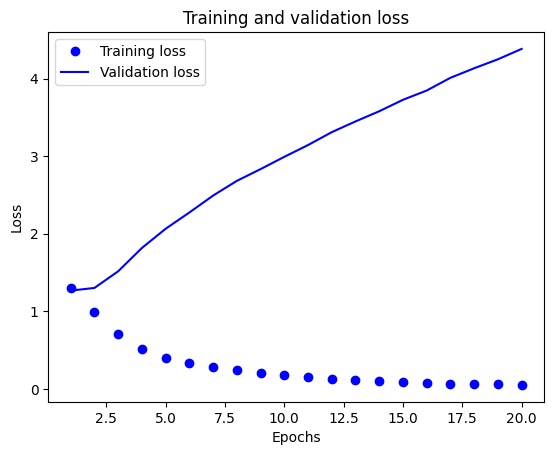

In [ ]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

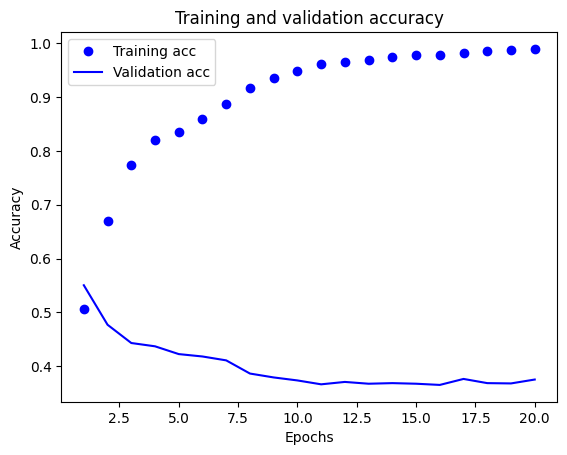

In [ ]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

57/57 [==============================] - 0s 3ms/step
F1 Score: 0.9539244944331133
Recall: 0.9538888888888889
Precision: 0.9542968345030315
Confusion Matrix:
[[246   0   2  19]
 [  1  79   0   2]
 [  0   0 443  17]
 [  9   0  33 949]]


<Axes: >

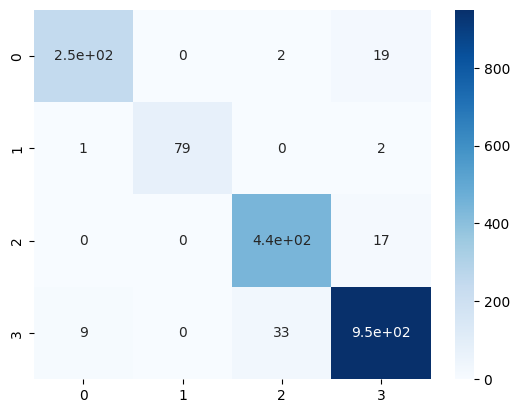

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score

# Evaluate the model on the test set
y_pred = model.predict(test_examples_np)
y_pred_labels = y_pred.argmax(axis=1)
y_test_labels = test_labels_np

# Calculate F1 score
f1 = f1_score(y_test_labels, y_pred_labels, average='weighted')
print("F1 Score:", f1)

# Calculate recall
recall = recall_score(y_test_labels, y_pred_labels, average='weighted')
print("Recall:", recall)

# Calculate precision
precision = precision_score(y_test_labels, y_pred_labels, average='weighted')
print("Precision:", precision)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test_labels, y_pred_labels)
print("Confusion Matrix:")
print(confusion_mat)
sns.heatmap(confusion_mat,
            annot = True,
            cmap=plt.cm.Blues)

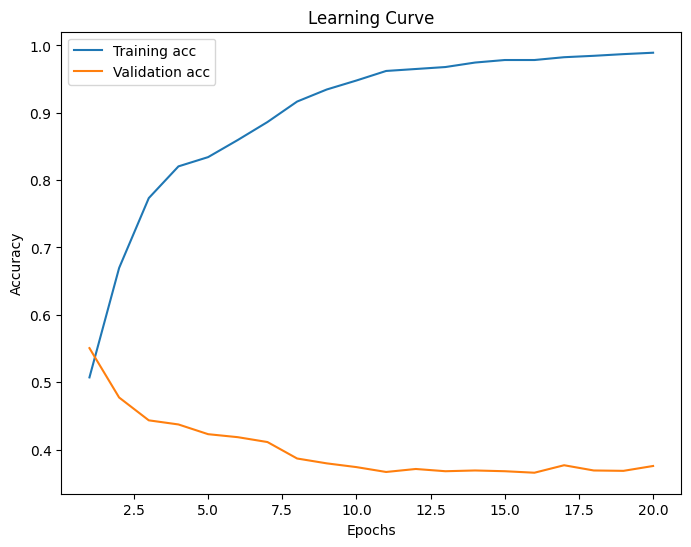

In [ ]:
# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(history.history['accuracy']) + 1), history.history['accuracy'], label='Training acc')
plt.plot(np.arange(1, len(history.history['val_accuracy']) + 1), history.history['val_accuracy'], label='Validation acc')
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()